# Analysis of the 25 largest retailers in the United States

## Problem Statement

A retail company is going to open operations in the USA. The sales managers want to know about retail market through the analysis of the 25 largest retail companies in the country. They have some business questions in order to get a better understanding of the market.

As a new hired Data Analyst the objective is to provide insights about retail market and competitors through the report: largest_us_retailers.csv

## Steps

The analysis will be perform in 3 phases:
1. Data inspection, analysis and classification
2. Answer manager's business questions
3. Provide recommendations

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data from csv file
# df = pd.read_csv('/work/largest_us_retailers.csv')
df = pd.read_csv('Doc/largest_us_retailers.csv')

## I. Data inspection, analysis and classification

### 1. Data Inspection

In [3]:
df.shape

(25, 6)

In [4]:
df

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery


#### Observations
1. Data frame contains 25 rows and 6 columns
2. Type of data: *company's name, Sales in billion dollars, Number of stores, sales average per stores, store count growth and category of the retailer*
3. There are NaN values into data frame and must be clean it.

#### Data Wrangling & Cleaning

* Remove NaN values from numerical columns

In [5]:
# This class finds columns with numerical dtypes (int64,float64) 
# and replaces NaN values for 0
class FillNaN:
    def __init__(self,dataframe) -> None:
        self.dataframe = dataframe

    def fill_numerical(self):
        self.numerical_column_list = self.dataframe.dtypes[(self.dataframe.dtypes == 'int64') | (self.dataframe.dtypes == 'float64')].index

        for col in self.numerical_column_list:
            self.dataframe[col].replace(np.nan,0,inplace=True)

        return self.dataframe

In [6]:
df1 = FillNaN(df).fill_numerical()

#### NaN values removed from dataframe

In [7]:
df1

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,0.0,0.000000,0.000000,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery


#### Data inspection of the 'Category' column

In [8]:
df.Category

0              Supercenters
1                   Grocery
2            Warehouse Club
3          Home Improvement
4               Drug Stores
5               Drug Stores
6     Electronic/Mail Order
7              Supercenters
8          Home Improvement
9                   Grocery
10          Warehouse Clubs
11                      NaN
12              Electronics
13                  Grocery
14              Drug Stores
15                  Grocery
16        Department Stores
17                  Apparel
18                  Grocery
19            Dollar Stores
20            Dollar Stores
21                  Grocery
22        Department Stores
23                  Grocery
24             Supercenters
Name: Category, dtype: object

#### Observations
1. The enterprise Apple incl. Online has no category on the dataframe and it can be assign 'Electronic/Mail Order' as category due to their operations are based on online shopping
2. The category Warehouse Club, can be normalized choosing one of this both: Warehouse Club y Warehouse Clubs

#### Assign 'Electronic/Mail Order' as a category for Apple incl. Online

In [9]:
df1['Category'] = df1['Category'].replace(np.nan,'Electronic/Mail Order')

# 3. Change applied
df1[df1['Company']=='Apple incl. Online']

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
11,Apple incl. Online,37664,0.0,0.0,0.0,Electronic/Mail Order


#### Normalize Warehouse Club category

In [10]:
df1['Category'] = df1['Category'].replace(['Warehouse Clubs'],'Warehouse Club')

#### Dataframe cleaned

In [11]:
df1

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,0.0,0.000000,0.000000,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery


### 2. Data Análisis

* Run preliminary stats

In [12]:
df1.describe()

,Sales,Stores,Sales/Avg. Store,Store Count Growth
count,25.000000,25.000000,25.000000,25.000000
mean,71063.080000,3189.240000,33.921289,0.037012
std,125405.727644,3984.120117,40.213239,0.066572
min,16592.000000,0.000000,0.000000,-0.059515
25%,24402.000000,794.000000,9.369545,0.000000
50%,34980.000000,1772.000000,24.685956,0.018927
75%,71687.000000,3931.000000,39.982033,0.078241
max,658119.000000,14250.000000,187.795620,0.255662


#### Visualize the total sales by company

In [24]:
# list of colors that will be used on charts
colours = ['#fae7b5', '#deb887', '#bebada', '#fb8072','#80b1d3'
               , '#fdb462', '#b3de69','#e32636','#ffbf00','#9966cc'
              , '#00ffff','#8db600','#e9d66b','#fdee00','#f4c2c2'
              , '#8dd3c7','#ff2052','#bcd4e6','#f5f5dc','#fe6f5e'
              , '#ed872d', '#fff600','#91a3b0','#a3c1ad','#b87333']

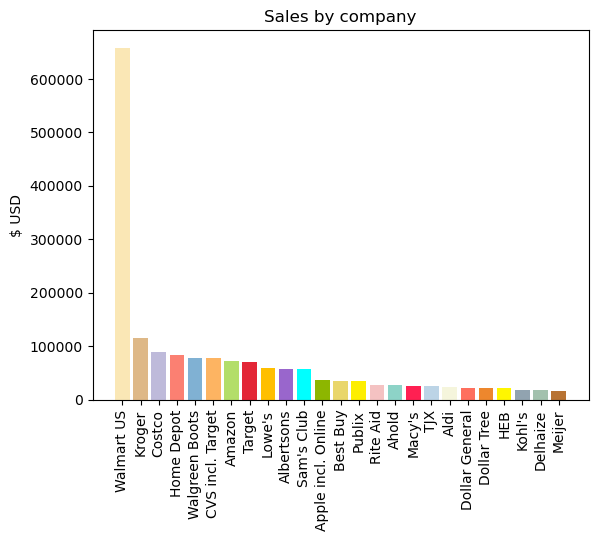

In [25]:
# dataframe sorted by Sales
df1 = df1.sort_values('Sales',ascending=False)

# Sales by company
x = df1['Company']
y = df1['Sales']
plt.bar(x,y, color=colours)
plt.title('Sales by company')
# plt.xlabel('Empresa')
plt.ylabel('$ USD')
plt.xticks(rotation='vertical')
plt.show()

In [26]:
# Difference between Walmart and Kroger
salesWalmart = df1.iloc[0,1]
salesKroger = df1.iloc[1,1]
difference = salesWalmart - salesKroger
print(f'Walmart has ${difference} USD of sales above of the second retailer, Kroger')

Walmart has $543082 USD of sales above of the second retailer, Kroger


In [27]:
import squarify

In [28]:
df1['Sales %'] = round((df1['Sales'] / df1['Sales'].sum())*100,2)

In [29]:
def distribution(dataframe):
    plot_labels = [f'{i} \n({str(j)} %)' for i,j in zip(dataframe['Company'], dataframe['Sales %'])]
        
    plt.figure(figsize=(10,10))

    squarify.plot(sizes=dataframe['Sales %'], label=plot_labels, color=colours, edgecolor='grey')

    # Remove all ticks and labels from x & y axis, but keep border on
    plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    plt.show()

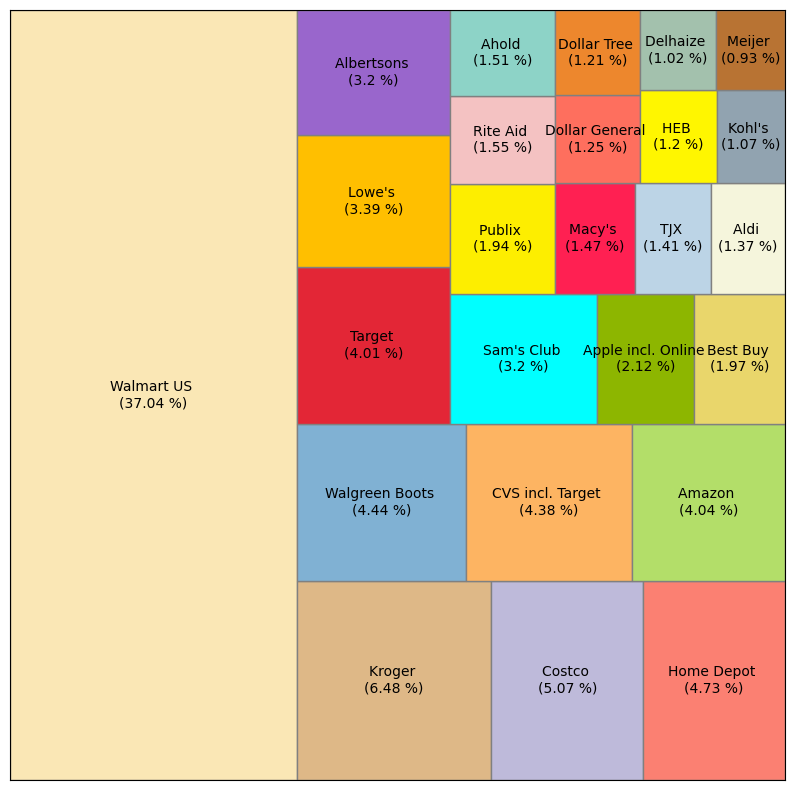

In [30]:
distribution(df1)

* Walmart is the mayor retailer in the United States, it has 658119 USD.
* Kroger is the second retailer, it has 115037 USD and has a difference of 543082 USD from the mayor retailer.

### 3. Data Classification

## II. Business Questions

### 1. What is the dominant company in sales? 

### 2. What is the average sales without counting the dominant company?

### 2. How much money in sales did most companies make?

### 3. How many stores do most companies have?

### 4. Is the number of stores related to the number of sales?, If a company has more stores, will it have more money from sales?

### 5.What is the range between sales?

### 6. What are the 5 companies that have the most physical stores? Which of them are among the 5 companies that had the most sales?

### Optional

### 7.  Which category generated the most sales?

### 8. What is the company that in relation to its number of physical stores generates more sales?

### 9. Which companies sell exclusively online? Do their sales stand out from those that also have physical stores?

## III. Recommendations

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=edc68bfa-8df4-47a4-8622-860ebb931fe9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>